In [117]:
import numpy as np
import matplotlib.pyplot as plt
from constants import *
%matplotlib inline

%run -i agn.py

plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.3
plt.rcParams['legend.handletextpad'] = 0.3
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 15
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['figure.subplot.wspace'] = 0.03
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.labelpad'] = 9
plt.rcParams['axes.labelsize'] = 18
#plt.rcParams['xtick.minor.visible']

agn.py:52: ConversionWarning: Some errors were detected !
    Line #64 (got 19 columns instead of 20)
    Line #65 (got 18 columns instead of 20)
    Line #66 (got 18 columns instead of 20)
    Line #67 (got 17 columns instead of 20)
    Line #68 (got 17 columns instead of 20)
    Line #69 (got 17 columns instead of 20)
    Line #70 (got 17 columns instead of 20)
    Line #71 (got 16 columns instead of 20)
    Line #72 (got 16 columns instead of 20)
    Line #73 (got 16 columns instead of 20)
    Line #74 (got 16 columns instead of 20)
    Line #75 (got 16 columns instead of 20)
    Line #76 (got 15 columns instead of 20)
  table = np.genfromtxt(path_to_table,skip_header=6,invalid_raise=False, missing_values = "", filling_values=0.0)


In [118]:
pc_to_cm   = 3.086e18    # parsec in centimeters
au_to_cm   = 1.496e13    # astronomical unit in centimeters
smass_to_g = 1.988435e33 # solar mass in grams
c          = 2.998e10    # speed of light, cm/s
G          = 6.674e-8    # gravitational constant, cgs
sig_sb     = 5.6704e-5   # stefan-boltzmann constant, cgs
k_b        = 1.3806e-16  # boltzmann constant, cgs 
mH         = 1.673e-24   # hydrogen mass, cgs

In [128]:
# params for both sets
Msmbh     = 1e8
model      = sirko_goodman
D_arr     = np.logspace(-4.5,3,1000)
alpha_    = 0.01
radeff    = 0.1
model      = sirko_goodman
b          = 0
tau_guess  = 1e2
pgas_guess = 1e-10*k_b*1e4/mH
p = np.array([b, tau_guess, pgas_guess])

# parameters for diff sg
EddRatios = [0.5, 0.05]

# init
if 1:
    sg_list           = []
    for EddRatio in EddRatios:
        sg_list.append(AGN_profile(model, Msmbh,D_arr,alpha_,EddRatio,radeff,p,BBH=None))

solution_lists    = []
solution_ref_list = []    
for sg_ in sg_list:
    a_start = [100.]
    M_start = [20.,60.]
    D_start = [0.1, 1, 2]#1, 3, 5]
    tmax = 1e6*1e3*yr_to_sec


    solution_list = []
    solution_ref  = {}

    i = 0
    for D0 in D_start:
        for a0 in a_start:
            for M0 in M_start:
                print("%s" % i)
                solution_ref["%s" % i] = [D0,a0,M0]
                solution_list.append(sg_._migrate_and_evolve_sim([0,tmax],D0,M0,a0,modified=1,photontrapping=1,RadEff=1e-2))
                i += 1
                
    print("iterating")
                
    solution_lists.append(solution_list)
    solution_ref_list.append(solution_ref)

0.00 % done...
0.10 % done...
0.20 % done...
0.30 % done...
0.40 % done...
0.50 % done...
0.60 % done...
0.70 % done...
0.80 % done...
0.90 % done...
1.00 % done...
1.10 % done...
1.20 % done...
1.30 % done...
1.40 % done...
1.50 % done...
1.60 % done...
1.70 % done...
1.80 % done...
1.90 % done...
2.00 % done...
2.10 % done...
2.20 % done...
2.30 % done...
2.40 % done...
2.50 % done...
2.60 % done...
2.70 % done...
2.80 % done...
2.90 % done...
3.00 % done...
3.10 % done...
3.20 % done...
3.30 % done...
3.40 % done...
3.50 % done...
3.60 % done...
3.70 % done...
3.80 % done...
3.90 % done...
4.00 % done...
4.10 % done...
4.20 % done...
4.30 % done...
4.40 % done...
4.50 % done...
4.60 % done...
4.70 % done...
4.80 % done...
4.90 % done...
5.00 % done...
5.10 % done...
5.20 % done...
5.30 % done...
5.40 % done...
5.50 % done...
5.60 % done...
5.70 % done...
5.80 % done...
5.90 % done...
6.00 % done...
6.10 % done...
6.20 % done...
6.30 % done...
6.40 % done...
6.50 % done...
6.60 % don

54.80 % done...
54.90 % done...
55.00 % done...
55.10 % done...
55.20 % done...
55.30 % done...
55.40 % done...
55.50 % done...
55.60 % done...
55.70 % done...
55.80 % done...
55.90 % done...
56.00 % done...
56.10 % done...
56.20 % done...
56.30 % done...
56.40 % done...
56.50 % done...
56.60 % done...
56.70 % done...
56.80 % done...
56.90 % done...
57.00 % done...
57.10 % done...
57.20 % done...
57.30 % done...
57.40 % done...
57.50 % done...
57.60 % done...
57.70 % done...
57.80 % done...
57.90 % done...
58.00 % done...
58.10 % done...
58.20 % done...
58.30 % done...
58.40 % done...
58.50 % done...
58.60 % done...
58.70 % done...
58.80 % done...
58.90 % done...
59.00 % done...
59.10 % done...
59.20 % done...
59.30 % done...
59.40 % done...
59.50 % done...
59.60 % done...
59.70 % done...
59.80 % done...
59.90 % done...
60.00 % done...
60.10 % done...
60.20 % done...
60.30 % done...
60.40 % done...
60.50 % done...
60.60 % done...
60.70 % done...
60.80 % done...
60.90 % done...
61.00 % 

7.10 % done...
7.20 % done...
7.30 % done...
7.40 % done...
7.50 % done...
7.60 % done...
7.70 % done...
7.80 % done...
7.90 % done...
8.00 % done...
8.10 % done...
8.20 % done...
8.30 % done...
8.40 % done...
8.50 % done...
8.60 % done...
8.70 % done...
8.80 % done...
8.90 % done...
9.00 % done...
9.10 % done...
9.20 % done...
9.30 % done...
9.40 % done...
9.50 % done...
9.60 % done...
9.70 % done...
9.80 % done...
9.90 % done...
10.00 % done...
10.10 % done...
10.20 % done...
10.30 % done...
10.40 % done...
10.50 % done...
10.60 % done...
10.70 % done...
10.80 % done...
10.90 % done...
11.00 % done...
11.10 % done...
11.20 % done...
11.30 % done...
11.40 % done...
11.50 % done...
11.60 % done...
11.70 % done...
11.80 % done...
11.90 % done...
12.00 % done...
12.10 % done...
12.20 % done...
12.30 % done...
12.40 % done...
12.50 % done...
12.60 % done...
12.70 % done...
12.80 % done...
12.90 % done...
13.00 % done...
13.10 % done...
13.20 % done...
13.30 % done...
13.40 % done...
13.50

48.40 % done...
48.50 % done...
48.60 % done...
48.70 % done...
48.80 % done...
48.90 % done...
49.00 % done...
49.10 % done...
49.20 % done...
49.30 % done...
49.40 % done...
49.50 % done...
49.60 % done...
49.70 % done...
49.80 % done...
49.90 % done...
50.00 % done...
50.10 % done...
50.20 % done...
50.30 % done...
50.40 % done...
50.50 % done...
50.60 % done...
50.70 % done...
50.80 % done...
50.90 % done...
51.00 % done...
51.10 % done...
51.20 % done...
51.30 % done...
51.40 % done...
51.50 % done...
51.60 % done...
51.70 % done...
51.80 % done...
51.90 % done...
52.00 % done...
52.10 % done...
52.20 % done...
52.30 % done...
52.40 % done...
52.50 % done...
52.60 % done...
52.70 % done...
52.80 % done...
52.90 % done...
53.00 % done...
53.10 % done...
53.20 % done...
53.30 % done...
53.40 % done...
53.50 % done...
53.60 % done...
53.70 % done...
53.80 % done...
53.90 % done...
54.00 % done...
54.10 % done...
54.20 % done...
54.30 % done...
54.40 % done...
54.50 % done...
54.60 % 

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.0008082900446171205)
("adot_a's:", -7.050109935672911e-15, -1.5831425307052467e-12, -2.01244899124811e-30, 'a = ', 99.50685147048772)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.0008082806179545365)
("adot_a's:", -7.050109935672911e-15, -1.5844050491701093e-12, -2.0253179206018028e-30, 'a = ', 99.34893139152722)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.0008082334868470344)
("adot_a's:", -7.050109935672909e-15, -1.5907571840167858e-12, -2.0911733242119466e-30, 'a = ', 98.55995029475963)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.0008082251082539511)
("adot_a's:", -7.050109935672911e-15, -1.5918917615102057e-12, -2.1031324393358762e-30, 'a = ', 98.42000189207664)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.000808214635127544)
("adot_a's:", -7.05010993567291e-15, -1.5933120261078581e-12, -2.1181877047577713e-30, 'a = ', 98.24522812076707)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.0008082146351276431)
("adot_a's:", -7.050109935672911e-15, -

r_pt < a
('eff_drag = ', 0.6348915980393703, 'eff_edd = ', 0.0007957039722027026)
("adot_a's:", -7.05010993567291e-15, -7.77041259483825e-12, -1.2731023756886535e-19, 'a = ', 0.19982834579158923)
r_pt < a
('eff_drag = ', 0.6290670001306029, 'eff_edd = ', 0.000795692497997927)
("adot_a's:", -7.05010993567291e-15, -7.703233843325106e-12, -1.320748574502751e-19, 'a = ', 0.1980025231417223)
r_pt < a
('eff_drag = ', 0.6001363654935836, 'eff_edd = ', 0.0007956351302941495)
("adot_a's:", -7.05010993567291e-15, -7.368527733280144e-12, -1.5934504927050963e-19, 'a = ', 0.18893190435332227)
r_pt < a
('eff_drag = ', 0.5949060733838525, 'eff_edd = ', 0.0007956249319987979)
("adot_a's:", -7.0501099356729115e-15, -7.307830912546435e-12, -1.650049008485165e-19, 'a = ', 0.1872915813254292)
r_pt < a
('eff_drag = ', 0.5889831596110436, 'eff_edd = ', 0.0007956121843028509)
("adot_a's:", -7.050109935672911e-15, -7.2390374403154404e-12, -1.7171928605652044e-19, 'a = ', 0.18543463369063382)
r_pt < a
('eff_dr

("adot_a's:", -7.05010993567291e-15, -6.888202506581398e-14, -2.0319413149786322e-11, 'a = ', 0.0018218053793772795)
r_pt < a
('eff_drag = ', 0.005569609531956585, 'eff_edd = ', 0.0007529291955303506)
("adot_a's:", -7.05010993567291e-15, -7.6476760246613e-14, -1.3373974505284733e-11, 'a = ', 0.0020225538428743773)
r_pt < a
('eff_drag = ', 0.005532034485636764, 'eff_edd = ', 0.0007529248516576256)
("adot_a's:", -7.050109935672911e-15, -7.596157440319078e-14, -1.3740371105623195e-11, 'a = ', 0.0020089387609794024)
r_pt < a
('eff_drag = ', 0.005338046390365168, 'eff_edd = ', 0.0007529031327963938)
("adot_a's:", -7.050109935672911e-15, -7.330159963339875e-14, -1.5845321371974203e-11, 'a = ', 0.001938637221897429)
r_pt < a
('eff_drag = ', 0.005300019714847557, 'eff_edd = ', 0.0007528992717278176)
("adot_a's:", -7.05010993567291e-15, -7.27801058587213e-14, -1.6304270285310165e-11, 'a = ', 0.0019248524555669385)
r_pt < a
('eff_drag = ', 0.00525350776256141, 'eff_edd = ', 0.0007528944454185643

r_pt > a
('eff_drag = ', array(0.00075276), 'eff_edd = ', 0.0007527602549427942)
("adot_a's:", -7.050109935672909e-15, -1.0344425011001888e-14, -1.9038186504513386e-07, 'a = ', 0.00018518319611079864)
r_pt > a
('eff_drag = ', array(0.00075276), 'eff_edd = ', 0.0007527602544677723)
("adot_a's:", -7.050109935672911e-15, -1.0344431329602658e-14, -1.987099887993504e-07, 'a = ', 0.0001832116327318924)
r_pt > a
('eff_drag = ', array(0.00075276), 'eff_edd = ', 0.0007527602520926657)
("adot_a's:", -7.05010993567291e-15, -1.0344464862529952e-14, -2.5140508114476137e-07, 'a = ', 0.00017274856865666927)
r_pt > a
('eff_drag = ', array(0.00075276), 'eff_edd = ', 0.000752760251670425)
("adot_a's:", -7.0501099356729115e-15, -1.0344471866044037e-14, -2.645387706815538e-07, 'a = ', 0.00017056331873567822)
r_pt > a
('eff_drag = ', array(0.00075276), 'eff_edd = ', 0.0007527602511426236)
("adot_a's:", -7.050109935672911e-15, -1.0344480292390234e-14, -2.8149851546456283e-07, 'a = ', 0.00016793412021080023)

r_pt > a
('eff_drag = ', array(0.00075276), 'eff_edd = ', 0.0007527602430607336)
("adot_a's:", -7.050109935672909e-15, -1.034493009599384e-14, -0.00038611714201141234, 'a = ', 2.759486043610204e-05)
r_pt > a
('eff_drag = ', array(0.00075276), 'eff_edd = ', 0.0007527602430595121)
("adot_a's:", -7.050109935672911e-15, -1.0344935147335366e-14, -0.0004885101628052584, 'a = ', 2.6018938338206137e-05)
r_pt > a
('eff_drag = ', array(0.00075276), 'eff_edd = ', 0.0007527602430592943)
("adot_a's:", -7.05010993567291e-15, -1.0344936202328051e-14, -0.000514030544600017, 'a = ', 2.5689801056583568e-05)
r_pt > a
('eff_drag = ', array(0.00075276), 'eff_edd = ', 0.0007527602430590228)
("adot_a's:", -7.05010993567291e-15, -1.0344937471650159e-14, -0.0005469854277619381, 'a = ', 2.529379728034954e-05)
r_pt > a
('eff_drag = ', array(0.00075276), 'eff_edd = ', 0.0007527602430590228)
("adot_a's:", -7.05010993567291e-15, -1.0344937395880012e-14, -0.0005449454131507665, 'a = ', 2.5317436087018474e-05)
r_pt >

r_pt > a
('eff_drag = ', array(0.00075276), 'eff_edd = ', 0.0007527602430548641)
("adot_a's:", -7.050109935672911e-15, -1.0345005907653273e-14, -0.9259487920374966, 'a = ', 3.943312816359153e-06)
r_pt > a
('eff_drag = ', array(0.00075276), 'eff_edd = ', 0.0007527602430548641)
("adot_a's:", -7.050109935672911e-15, -1.034500599247773e-14, -0.9512271404993156, 'a = ', 3.916849768068239e-06)
r_pt > a
('eff_drag = ', array(0.00075276), 'eff_edd = ', 0.0007527602430548637)
("adot_a's:", -7.05010993567291e-15, -1.0345006430566023e-14, -1.0964355766314753, 'a = ', 3.7801775010152884e-06)
r_pt > a
('eff_drag = ', array(0.00075276), 'eff_edd = ', 0.0007527602430548633)
("adot_a's:", -7.050109935672911e-15, -1.034500651653848e-14, -1.1281132834897198, 'a = ', 3.7533563099528284e-06)
r_pt > a
('eff_drag = ', array(0.00075276), 'eff_edd = ', 0.0007527602430548633)
("adot_a's:", -7.050109935672911e-15, -1.0345006621639513e-14, -1.1684096611776884, 'a = ', 3.7205674976846446e-06)
r_pt > a
('eff_drag 

('eff_drag = ', 0.6941943855364643, 'eff_edd = ', 0.00027716474402367697)
("adot_a's:", -7.05010993567291e-15, -1.7780182475846072e-11, -6.4861973901151106e-24, 'a = ', 5.359255596767761)
r_pt < a
('eff_drag = ', 0.6793315649911119, 'eff_edd = ', 0.0002771578068821716)
("adot_a's:", -7.050109935672911e-15, -1.7500332274849346e-11, -7.071258840716139e-24, 'a = ', 5.244819945380438)
r_pt < a
('eff_drag = ', 0.6725135958879359, 'eff_edd = ', 0.00027715433835432193)
("adot_a's:", -7.050109935672911e-15, -1.7371074308598772e-11, -7.361635655855576e-24, 'a = ', 5.192333338893906)
r_pt < a
('eff_drag = ', 0.6386639501953699, 'eff_edd = ', 0.00027713699668759203)
("adot_a's:", -7.050109935672911e-15, -1.6720778712940842e-11, -9.046121054805066e-24, 'a = ', 4.931708951549037)
r_pt < a
('eff_drag = ', 0.6325634056958647, 'eff_edd = ', 0.00027713391387058445)
("adot_a's:", -7.050109935672911e-15, -1.660202214666404e-11, -9.399299072718809e-24, 'a = ', 4.884728109805446)
r_pt < a
('eff_drag = ', 0

r_pt < a
('eff_drag = ', 0.000890469388649449, 'eff_edd = ', 0.00020628902368133995)
("adot_a's:", -7.050109935672911e-15, -4.4987165805321465e-14, -2.055456905131493e-13, 'a = ', 0.013620760863202392)
r_pt < a
('eff_drag = ', 0.0008491560649451267, 'eff_edd = ', 0.00020557298914658818)
("adot_a's:", -7.05010993567291e-15, -4.305269104909318e-14, -2.414869633809253e-13, 'a = ', 0.013093328727250298)
r_pt < a
('eff_drag = ', 0.0008253429537743294, 'eff_edd = ', 0.00020521563564151175)
("adot_a's:", -7.050109935672911e-15, -4.1920030932727186e-14, -2.667047472274532e-13, 'a = ', 0.012777285465896402)
r_pt < a
('eff_drag = ', 0.0006943697765889864, 'eff_edd = ', 0.00020335605082164366)
("adot_a's:", -7.05010993567291e-15, -3.559872050810618e-14, -4.936598376784543e-13, 'a = ', 0.010976209212688564)
r_pt < a
('eff_drag = ', 0.0006691604397774873, 'eff_edd = ', 0.00020302730134488315)
("adot_a's:", -7.05010993567291e-15, -3.4363425014623096e-14, -5.64734293866274e-13, 'a = ', 0.010616997655

('eff_drag = ', array(0.00020099), 'eff_edd = ', 0.00020098894897403388)
("adot_a's:", -7.05010993567291e-15, -1.0436032141248905e-14, -1.4695076244977615e-09, 'a = ', 0.0014897986419386904)
r_pt > a
('eff_drag = ', array(0.00020099), 'eff_edd = ', 0.0002009889202582725)
("adot_a's:", -7.050109935672911e-15, -1.0436045357812275e-14, -1.5220203776843758e-09, 'a = ', 0.0014767787409060505)
r_pt > a
('eff_drag = ', array(0.00020099), 'eff_edd = ', 0.0002009889202582725)
("adot_a's:", -7.050109935672911e-15, -1.0436044821494139e-14, -1.519842618569721e-09, 'a = ', 0.001477307470274388)
r_pt > a
('eff_drag = ', array(0.00020099), 'eff_edd = ', 0.00020098886117787557)
("adot_a's:", -7.0501099356729115e-15, -1.043607256559356e-14, -1.6377179471006707e-09, 'a = ', 0.001449975951889934)
r_pt > a
('eff_drag = ', array(0.00020099), 'eff_edd = ', 0.0002009888316376817)
("adot_a's:", -7.0501099356729115e-15, -1.0436088234901119e-14, -1.7093601258931239e-09, 'a = ', 0.0014345384668385552)
r_pt > a
(

('eff_drag = ', array(0.00020099), 'eff_edd = ', 0.00020098812229265263)
("adot_a's:", -7.050109935672909e-15, -1.0437322392933701e-14, -3.1869471121736732e-06, 'a = ', 0.00021831180079180857)
r_pt > a
('eff_drag = ', array(0.00020099), 'eff_edd = ', 0.00020098812224241428)
("adot_a's:", -7.050109935672911e-15, -1.0437330125509197e-14, -3.673635183124755e-06, 'a = ', 0.0002106914537374158)
r_pt > a
('eff_drag = ', array(0.00020099), 'eff_edd = ', 0.00020098812223348305)
("adot_a's:", -7.050109935672911e-15, -1.0437331643045284e-14, -3.779816019363447e-06, 'a = ', 0.00020919594442081246)
r_pt > a
('eff_drag = ', array(0.00020099), 'eff_edd = ', 0.000200988122222319)
("adot_a's:", -7.050109935672909e-15, -1.0437333498205455e-14, -3.914886328075324e-06, 'a = ', 0.00020736771254317637)
r_pt > a
('eff_drag = ', array(0.00020099), 'eff_edd = ', 0.000200988122222319)
("adot_a's:", -7.050109935672909e-15, -1.043733342286692e-14, -3.909284662395755e-06, 'a = ', 0.000207441957644289)
r_pt > a
('

("adot_a's:", -7.05010993567291e-15, -1.0437513903950564e-14, -0.00944923052202679, 'a = ', 2.958501646221742e-05)
r_pt > a
('eff_drag = ', array(0.00020099), 'eff_edd = ', 0.0002009881219120634)
("adot_a's:", -7.050109935672909e-15, -1.0437514117062235e-14, -0.009722359802611331, 'a = ', 2.9375008704588315e-05)
r_pt > a
('eff_drag = ', array(0.00020099), 'eff_edd = ', 0.0002009881219120592)
("adot_a's:", -7.050109935672911e-15, -1.0437514377586846e-14, -0.010069801701998247, 'a = ', 2.911827858074452e-05)
r_pt > a
('eff_drag = ', array(0.00020099), 'eff_edd = ', 0.0002009881219120592)
("adot_a's:", -7.050109935672911e-15, -1.0437514367006325e-14, -0.01005539177972383, 'a = ', 2.912870499777896e-05)
r_pt > a
('eff_drag = ', array(0.00020099), 'eff_edd = ', 0.0002009881219120501)
("adot_a's:", -7.050109935672911e-15, -1.0437514913862464e-14, -0.010835236611443939, 'a = ', 2.8589813768436375e-05)
r_pt > a
('eff_drag = ', array(0.00020099), 'eff_edd = ', 0.00020098812191204568)
("adot_a's

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.7942027016295028)
("adot_a's:", -7.0501099356729115e-15, -1.5912511844367949e-15, -1.9729145263349082e-30, 'a = ', 99.99999903984876)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.7942027016295028)
("adot_a's:", -7.0501099356729115e-15, -1.5912511844367949e-15, -1.9729145263349082e-30, 'a = ', 99.99999903984876)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.7942026900102407)
("adot_a's:", -7.05010993567291e-15, -1.591251232320241e-15, -1.9729147461798424e-30, 'a = ', 99.99999731157655)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.7942026842006097)
("adot_a's:", -7.050109935672911e-15, -1.5912512562619644e-15, -1.9729148561023182e-30, 'a = ', 99.99999644744048)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.7942026551524561)
("adot_a's:", -7.050109935672911e-15, -1.5912513759705878e-15, -1.972915405714794e-30, 'a = ', 99.99999212676009)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.7942026499883403)
("adot_a's:", -7.050109935672911e-15, -1.5912513972521

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.113290214157532)
("adot_a's:", -7.050109935672911e-15, -9.072468024228859e-14, -7.175489661434609e-14, 'a = ', 0.0269370499037946)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.11329021533190635)
("adot_a's:", -7.050109935672911e-15, -9.072468024283344e-14, -7.175686325329163e-14, 'a = ', 0.026936865172138294)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.11309135428865723)
("adot_a's:", -7.0501099356729115e-15, -9.088928567851218e-14, -8.264875545472999e-14, 'a = ', 0.026029148762533268)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.11299182545358082)
("adot_a's:", -7.050109935672911e-15, -9.09720337638312e-14, -8.92777254619612e-14, 'a = ', 0.02554534721927415)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.11249602007419986)
("adot_a's:", -7.050109935672911e-15, -9.138690673398261e-14, -1.3651750803181306e-13, 'a = ', 0.023032529534077445)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.11240806779161375)
("adot_a's:", -7.050109935672911e-15, -9.146100

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.11114855123418028)
("adot_a's:", -7.050109935672911e-15, -9.260376541778957e-14, -1.2159166582765267e-09, 'a = ', 0.0023880107035282577)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.11114855123418028)
("adot_a's:", -7.050109935672911e-15, -9.260376101599895e-14, -1.2141770847720642e-09, 'a = ', 0.0023888655809144667)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.11114853621793314)
("adot_a's:", -7.05010993567291e-15, -9.260400113623766e-14, -1.3083547387564576e-09, 'a = ', 0.002344665419311073)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.11114852870980907)
("adot_a's:", -7.050109935672909e-15, -9.260413595024835e-14, -1.3655943558823754e-09, 'a = ', 0.002319700122156016)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.11114849116919912)
("adot_a's:", -7.050109935672911e-15, -9.260484949350724e-14, -1.7277784554868695e-09, 'a = ', 0.0021872093186758954)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.11114848449531414)
("adot_a's:", -7.05010993567291e-15

("adot_a's:", -7.050109935672909e-15, -9.26147591199098e-14, -5.8969845092751375e-06, 'a = ', 0.00028615754227752496)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.11114834837238469)
("adot_a's:", -7.050109935672911e-15, -9.261477481380028e-14, -6.154943815622051e-06, 'a = ', 0.00028311095232362316)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.11114834836405592)
("adot_a's:", -7.050109935672911e-15, -9.261485810079746e-14, -7.787146558088162e-06, 'a = ', 0.0002669427356159848)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.1111483483625752)
("adot_a's:", -7.0501099356729115e-15, -9.26148754954077e-14, -8.193955565403095e-06, 'a = ', 0.00026356594367720805)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.1111483483607243)
("adot_a's:", -7.050109935672909e-15, -9.261489642392403e-14, -8.719274549661286e-06, 'a = ', 0.0002595031331255666)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.1111483483607243)
("adot_a's:", -7.050109935672909e-15, -9.261489517472253e-14, -8.68675561603594e-06, 'a = ', 0.00025

r_pt < a
('eff_drag = ', 0.308124807712823, 'eff_edd = ', 0.11114834833236702)
("adot_a's:", -7.050109935672911e-15, -2.8537313298785235e-14, -0.05738264015975645, 'a = ', 2.8811612320792177e-05)
r_pt < a
('eff_drag = ', 0.30237847784910155, 'eff_edd = ', 0.11114834833236673)
("adot_a's:", -7.050109935672909e-15, -2.8005111562146398e-14, -0.06187050809137893, 'a = ', 2.8274294246568257e-05)
r_pt < a
('eff_drag = ', 0.29912970814807915, 'eff_edd = ', 0.11114834833236654)
("adot_a's:", -7.050109935672911e-15, -2.7704223691329672e-14, -0.06460245162686236, 'a = ', 2.7970513795262973e-05)
r_pt < a
('eff_drag = ', 0.28187598162994015, 'eff_edd = ', 0.11114834833236573)
("adot_a's:", -7.050109935672911e-15, -2.6106253361946623e-14, -0.08193225385520196, 'a = ', 2.6357181576999186e-05)
r_pt < a
('eff_drag = ', 0.27826755138762965, 'eff_edd = ', 0.11114834833236564)
("adot_a's:", -7.050109935672911e-15, -2.5772055118894625e-14, -0.08626545606295118, 'a = ', 2.6019770597338784e-05)
r_pt < a
('e

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.10376979155354987)
("adot_a's:", -7.050109935672911e-15, -9.577882023003032e-14, -1.8704226852133268e-19, 'a = ', 0.7444038657178146)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.10376986073743784)
("adot_a's:", -7.05010993567291e-15, -9.57733230861353e-14, -1.8580165083707773e-19, 'a = ', 0.7456430982012221)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.10525106031154496)
("adot_a's:", -7.05010993567291e-15, -9.383091323210776e-14, -9.507404052150387e-20, 'a = ', 0.8743314880430431)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.10509233060100655)
("adot_a's:", -7.05010993567291e-15, -9.40380419004115e-14, -1.0184612977240256e-19, 'a = ', 0.8601799898589788)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.1043036387878397)
("adot_a's:", -7.050109935672911e-15, -9.507583002313506e-14, -1.456910003069816e-19, 'a = ', 0.7900091999800717)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.10416393194580464)
("adot_a's:", -7.050109935672911e-15, -9.52615081312460

("adot_a's:", -7.05010993567291e-15, -1.2784191409092472e-13, -3.8896920262745936e-11, 'a = ', 0.007159372249990416)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.08054786458817818)
("adot_a's:", -7.050109935672911e-15, -1.2784187949756063e-13, -3.875207490417689e-11, 'a = ', 0.007166052869584882)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.08055040440509288)
("adot_a's:", -7.050109935672911e-15, -1.2783377048864618e-13, -2.5554489602798735e-11, 'a = ', 0.007952054538288646)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.08055021191862445)
("adot_a's:", -7.05010993567291e-15, -1.2783435369360217e-13, -2.6254293500237456e-11, 'a = ', 0.007898536772872375)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.0805492494956968)
("adot_a's:", -7.050109935672911e-15, -1.2783731519496741e-13, -3.0274941022568174e-11, 'a = ', 0.00762217262096847)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.08054907839931881)
("adot_a's:", -7.050109935672909e-15, -1.2783786797883913e-13, -3.115187012323043e-11, 'a = ', 0.007

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.08054292061601641)
("adot_a's:", -7.05010993567291e-15, -1.278828683697571e-13, -2.885058745631206e-07, 'a = ', 0.0007714892319218191)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.08054292057505957)
("adot_a's:", -7.05010993567291e-15, -1.2788293006441676e-13, -3.0700218221304023e-07, 'a = ', 0.000759596873363532)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.08054292057505957)
("adot_a's:", -7.05010993567291e-15, -1.2788292638554616e-13, -3.0585720246418255e-07, 'a = ', 0.0007603067673581975)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.08054292089494561)
("adot_a's:", -7.05010993567291e-15, -1.2788249748917245e-13, -2.0240603149055842e-07, 'a = ', 0.000842971070670366)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.0805429208705829)
("adot_a's:", -7.050109935672911e-15, -1.2788252685407922e-13, -2.0793360705411648e-07, 'a = ', 0.0008373120885945979)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.08054292074876925)
("adot_a's:", -7.05010993567291e-15,

r_pt < a
('eff_drag = ', 0.3122089859980139, 'eff_edd = ', 0.08054291994752222)
("adot_a's:", -7.050109935672909e-15, -3.9927305826568544e-14, -0.0030159628744700373, 'a = ', 7.629780397330655e-05)
r_pt < a
('eff_drag = ', 0.3073965093239329, 'eff_edd = ', 0.08054291994751837)
("adot_a's:", -7.050109935672911e-15, -3.93118570355602e-14, -0.0032093114105795355, 'a = ', 7.512172827283204e-05)
r_pt < a
('eff_drag = ', 0.30768378050532846, 'eff_edd = ', 0.08054291994751837)
("adot_a's:", -7.050109935672911e-15, -3.9348595023332226e-14, -0.003197342598772767, 'a = ', 7.519193176238004e-05)
r_pt < a
('eff_drag = ', 0.3411344881020625, 'eff_edd = ', 0.0805429199475489)
("adot_a's:", -7.050109935672911e-15, -4.362647375123544e-14, -0.0021159484069448735, 'a = ', 8.336663411054862e-05)
r_pt < a
('eff_drag = ', 0.338843793961931, 'eff_edd = ', 0.08054291994754662)
("adot_a's:", -7.050109935672911e-15, -4.3333526025636837e-14, -0.0021737492395694194, 'a = ', 8.280683301479962e-05)
r_pt < a
('eff_

('eff_drag = ', 1, 'eff_edd = ', 1)
("adot_a's:", -1.1098095143964203e-15, -1.987695132967456e-16, -1.9729144060761256e-30, 'a = ', 99.99999998546022)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 1)
("adot_a's:", -1.1098095146585085e-15, -1.9876951339104222e-16, -1.972914409455232e-30, 'a = ', 99.99999995928866)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 1)
("adot_a's:", -1.109809514789553e-15, -1.9876951343819066e-16, -1.9729144111447858e-30, 'a = ', 99.99999994620286)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 1)
("adot_a's:", -1.1098095154447727e-15, -1.9876951367393208e-16, -1.9729144195925546e-30, 'a = ', 99.9999998807739)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 1)
("adot_a's:", -1.1098095155612567e-15, -1.9876951371584177e-16, -1.9729144210943794e-30, 'a = ', 99.9999998691421)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 1)
("adot_a's:", -1.1098095157068613e-15, -1.987695137682288e-16, -1.972914422971661e-30, 'a = ', 99.99999985460232)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 1)
("ado

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.42724423387106647)
("adot_a's:", -7.050109935672911e-15, -2.3692594812671745e-14, -2.345868190385635e-18, 'a = ', 0.6337213071673184)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.4234268034270971)
("adot_a's:", -7.050109935672911e-15, -2.3922635440126905e-14, -2.7629308306171e-18, 'a = ', 0.6119157525604683)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.4215072536758589)
("adot_a's:", -7.05010993567291e-15, -2.403937833448761e-14, -2.99127033860818e-18, 'a = ', 0.6016795113434014)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.4120972219777122)
("adot_a's:", -7.05010993567291e-15, -2.4627182393328853e-14, -4.516400812694859e-18, 'a = ', 0.5508807184943564)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.4104403156720305)
("adot_a's:", -7.05010993567291e-15, -2.4733442918415362e-14, -4.877674827554795e-18, 'a = ', 0.5418108484239472)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.4083835341257517)
("adot_a's:", -7.05010993567291e-15, -2.4866101483692715e-1

('eff_drag = ', 1, 'eff_edd = ', 0.26444011115902977)
("adot_a's:", -7.05010993567291e-15, -3.8929906175603684e-14, -5.542609104135063e-11, 'a = ', 0.012345173193777438)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.2644401111590298)
("adot_a's:", -7.05010993567291e-15, -3.892990318106947e-14, -5.534689457012362e-11, 'a = ', 0.012349587036578638)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.264439352070287)
("adot_a's:", -7.050109935672908e-15, -3.893017031473433e-14, -5.964456767638645e-11, 'a = ', 0.012120870015247616)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.264438972525271)
("adot_a's:", -7.050109935672911e-15, -3.893031394286168e-14, -6.22568284133479e-11, 'a = ', 0.011991683386166314)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.26443707481187845)
("adot_a's:", -7.050109935672909e-15, -3.893105901240676e-14, -7.878940074476979e-11, 'a = ', 0.01130607524822977)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.2644367374418564)
("adot_a's:", -7.050109935672908e-15, -3.893120592581915e-14

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.2644298614394626)
("adot_a's:", -7.050109935672911e-15, -3.8939046792870935e-14, -8.667407066625364e-07, 'a = ', 0.0011039866419822338)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.2644298613991522)
("adot_a's:", -7.050109935672911e-15, -3.893905835122433e-14, -9.22307982445605e-07, 'a = ', 0.001086968917040723)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.2644298613991522)
("adot_a's:", -7.050109935672911e-15, -3.89390576616221e-14, -9.188681892249883e-07, 'a = ', 0.001087984762128797)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.2644298617139881)
("adot_a's:", -7.05010993567291e-15, -3.893897731410977e-14, -6.080763772305613e-07, 'a = ', 0.0012062757124594002)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.26442986169001)
("adot_a's:", -7.050109935672911e-15, -3.893898281483377e-14, -6.246825316939597e-07, 'a = ', 0.0011981778210940132)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.2644298615701195)
("adot_a's:", -7.050109935672911e-15, -3.89390112

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.2644298607815245)
("adot_a's:", -7.050109935672909e-15, -3.893972130661543e-14, -0.008624367633292261, 'a = ', 0.00011053614197513908)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.2644298607815219)
("adot_a's:", -7.05010993567291e-15, -3.893972210132696e-14, -0.008999590531498031, 'a = ', 0.00010936552198823177)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.2644298607815089)
("adot_a's:", -7.050109935672909e-15, -3.893972631709015e-14, -0.011370311625374201, 'a = ', 0.00010315565138026915)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.2644298607815064)
("adot_a's:", -7.05010993567291e-15, -3.8939727196871044e-14, -0.011960091371440192, 'a = ', 0.00010185972357756551)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.2644298607815036)
("adot_a's:", -7.05010993567291e-15, -3.8939728255494056e-14, -0.012721388496118822, 'a = ', 0.00010030035929370851)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.2644298607815036)
("adot_a's:", -7.05010993567291e-15, -3.8939

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.4000992862365622)
("adot_a's:", -7.05010993567291e-15, -2.3808091323856512e-14, -3.2512882852145547e-21, 'a = ', 3.597912919997813)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.3982030685907513)
("adot_a's:", -7.050109935672911e-15, -2.3960862822828214e-14, -3.5516946828224344e-21, 'a = ', 3.5301657859799658)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.39585319927567814)
("adot_a's:", -7.05010993567291e-15, -2.4149599286675148e-14, -3.947100053378146e-21, 'a = ', 3.4514560764191646)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.3958622029683541)
("adot_a's:", -7.050109935672911e-15, -2.414661956608092e-14, -3.924079826140527e-21, 'a = ', 3.4564557333005004)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.41359008806352787)
("adot_a's:", -7.05010993567291e-15, -2.276256437793554e-14, -1.814591278471507e-21, 'a = ', 4.073454111402918)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.41168297669440423)
("adot_a's:", -7.0501099356729115e-15, -2.2906358741831

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.19284324407093398)
("adot_a's:", -7.050109935672911e-15, -5.3415492052354905e-14, -1.66841872668642e-11, 'a = ', 0.02108359013468231)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.1928568040779363)
("adot_a's:", -7.05010993567291e-15, -5.3410154051316784e-14, -1.0999264296772911e-11, 'a = ', 0.023397112931154415)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.1928557767313749)
("adot_a's:", -7.050109935672911e-15, -5.3410546327257097e-14, -1.1300549124505708e-11, 'a = ', 0.023239652555687246)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.19285064011240302)
("adot_a's:", -7.050109935672911e-15, -5.341252529874266e-14, -1.3031557121496876e-11, 'a = ', 0.022426532240509178)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.1928497269480232)
("adot_a's:", -7.050109935672909e-15, -5.341288728342118e-14, -1.3409094053713e-11, 'a = ', 0.022267042196181443)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.1928485854977864)
("adot_a's:", -7.05010993567291e-15, -5.34133

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.1928168754799195)
("adot_a's:", -7.050109935672911e-15, -5.343492797082356e-14, -2.8382016478772857e-08, 'a = ', 0.0032831773152447396)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.19281687508072962)
("adot_a's:", -7.050109935672911e-15, -5.3434943087229064e-14, -2.9157111304563752e-08, 'a = ', 0.0032611368749676027)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.19281687308477966)
("adot_a's:", -7.05010993567291e-15, -5.3435021141160314e-14, -3.360978498291713e-08, 'a = ', 0.003147304190228873)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.19281687272994408)
("adot_a's:", -7.05010993567291e-15, -5.3435036449206904e-14, -3.4581225601557624e-08, 'a = ', 0.003124964288375302)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.19281687228639988)
("adot_a's:", -7.050109935672911e-15, -5.3435055165736235e-14, -3.5816974077028846e-08, 'a = ', 0.003097654177021326)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.19281687228639988)
("adot_a's:", -7.050109935672911e-1

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.19281685996183845)
("adot_a's:", -7.050109935672911e-15, -5.343684489705226e-14, -6.530788445633318e-05, 'a = ', 0.0004740386652744169)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.19281685996165576)
("adot_a's:", -7.050109935672909e-15, -5.343684718812972e-14, -6.719549199288345e-05, 'a = ', 0.0004706739213881402)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.19281685996142758)
("adot_a's:", -7.050109935672911e-15, -5.3436849988931205e-14, -6.959667588006817e-05, 'a = ', 0.0004665605844119475)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.19281685996142758)
("adot_a's:", -7.050109935672911e-15, -5.343684987519335e-14, -6.949709439317649e-05, 'a = ', 0.0004667276268367778)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.19281685996095785)
("adot_a's:", -7.05010993567291e-15, -5.343685575477663e-14, -7.488713111487208e-05, 'a = ', 0.00045809270122624493)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.19281685996072317)
("adot_a's:", -7.050109935672911e-15

r_pt < a
('eff_drag = ', 0.7349724346383459, 'eff_edd = ', 0.19281685995509482)
("adot_a's:", -7.050109935672911e-15, -3.92747952918134e-14, -0.033277366993299896, 'a = ', 9.977412585219658e-05)
r_pt < a
('eff_drag = ', 0.7352360153122145, 'eff_edd = ', 0.19281685995509482)
("adot_a's:", -7.050109935672911e-15, -3.9288880260657846e-14, -0.03322967316418311, 'a = ', 9.980990750887833e-05)
r_pt < a
('eff_drag = ', 0.7214932107880447, 'eff_edd = ', 0.19281685995509384)
("adot_a's:", -7.05010993567291e-15, -3.8554505561517724e-14, -0.035834732378195434, 'a = ', 9.794429154352533e-05)
r_pt < a
('eff_drag = ', 0.7137214026326241, 'eff_edd = ', 0.19281685995509332)
("adot_a's:", -7.050109935672911e-15, -3.81392031770388e-14, -0.03742124904207131, 'a = ', 9.688925147881992e-05)
r_pt < a
('eff_drag = ', 0.6724379266995238, 'eff_edd = ', 0.19281685995509082)
("adot_a's:", -7.050109935672911e-15, -3.5933136441143566e-14, -0.047492426435182644, 'a = ', 9.128492874610438e-05)
r_pt < a
('eff_drag = 

r_pt < a
('eff_drag = ', 0.9908899043893336, 'eff_edd = ', 8.972899058042139e-05)
("adot_a's:", -7.050109935672911e-15, -5.577340393407631e-11, -5.662817956601604e-28, 'a = ', 24.299530686353826)
r_pt < a
('eff_drag = ', 0.9909539163032691, 'eff_edd = ', 8.972899058042267e-05)
("adot_a's:", -7.05010993567291e-15, -5.577561638211318e-11, -5.661354910992614e-28, 'a = ', 24.301100446484995)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 8.973166378313799e-05)
("adot_a's:", -7.05010993567291e-15, -5.570189572866711e-11, -5.085599625182331e-28, 'a = ', 24.961426059380685)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 8.973145861511415e-05)
("adot_a's:", -7.050109935672911e-15, -5.574628737154348e-11, -5.127394093906932e-28, 'a = ', 24.910408220097104)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 8.973043278545088e-05)
("adot_a's:", -7.050109935672911e-15, -5.5969568141580535e-11, -5.3426571161775095e-28, 'a = ', 24.65563068795758)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 8.973025041651144e-05)
("adot_

r_pt < a
('eff_drag = ', 0.052733857768862386, 'eff_edd = ', 8.868710460929674e-05)
("adot_a's:", -7.050109935672911e-15, -5.778050376035785e-12, -6.421440326895142e-23, 'a = ', 1.325475738030026)
r_pt < a
('eff_drag = ', 0.052782157621454, 'eff_edd = ', 8.86871046251086e-05)
("adot_a's:", -7.05010993567291e-15, -5.782930463339019e-12, -6.397968074123295e-23, 'a = ', 1.3266897637148996)
r_pt < a
('eff_drag = ', 0.0517166566735901, 'eff_edd = ', 8.86670309610174e-05)
("adot_a's:", -7.05010993567291e-15, -5.6762205402257085e-12, -6.92902214329528e-23, 'a = ', 1.3005280663133894)
r_pt < a
('eff_drag = ', 0.051228493180013865, 'eff_edd = ', 8.865699294786091e-05)
("adot_a's:", -7.05010993567291e-15, -5.6272562717323695e-12, -7.190329921224413e-23, 'a = ', 1.288559337533302)
r_pt < a
('eff_drag = ', 0.04880651104355745, 'eff_edd = ', 8.860683060928773e-05)
("adot_a's:", -7.05010993567291e-15, -5.383202489591296e-12, -8.687437001429001e-23, 'a = ', 1.2291029535206768)
r_pt < a
('eff_drag = '

r_pt < a
('eff_drag = ', 0.002153446050389431, 'eff_edd = ', 7.318204180161667e-05)
("adot_a's:", -7.0501099356729115e-15, -3.100731609539469e-13, -4.869843362321181e-18, 'a = ', 0.08102520860885712)
r_pt < a
('eff_drag = ', 0.0021582263260947056, 'eff_edd = ', 7.318208608123084e-05)
("adot_a's:", -7.050109935672911e-15, -3.107575121472242e-13, -4.826864826074877e-18, 'a = ', 0.08120497197434677)
r_pt < a
('eff_drag = ', 0.002478834365306672, 'eff_edd = ', 7.476854631735519e-05)
("adot_a's:", -7.05010993567291e-15, -3.490797721492476e-13, -3.2993868899326154e-18, 'a = ', 0.08917597309029615)
r_pt < a
('eff_drag = ', 0.002442647499707478, 'eff_edd = ', 7.459815255909831e-05)
("adot_a's:", -7.050109935672911e-15, -3.447983522006574e-13, -3.435283463173918e-18, 'a = ', 0.08829446200328035)
r_pt < a
('eff_drag = ', 0.002266883184464821, 'eff_edd = ', 7.375659822921694e-05)
("adot_a's:", -7.050109935672909e-15, -3.2377390879781416e-13, -4.2249240133821135e-18, 'a = ', 0.08390907787132502)
r

r_pt < a
('eff_drag = ', 0.000452507943641627, 'eff_edd = ', 5.5849261440835954e-05)
("adot_a's:", -7.050109935672909e-15, -8.593231981036929e-14, -2.752827230129173e-16, 'a = ', 0.030518067721491873)
r_pt < a
('eff_drag = ', 0.0004358756625701344, 'eff_edd = ', 5.530272432505947e-05)
("adot_a's:", -7.05010993567291e-15, -8.360422585305431e-14, -2.9520776560526307e-16, 'a = ', 0.030017431047908875)
r_pt < a
('eff_drag = ', 0.0004281161132051874, 'eff_edd = ', 5.503409968401735e-05)
("adot_a's:", -7.050109935672911e-15, -8.252270192854996e-14, -3.048913161063266e-16, 'a = ', 0.029790063217721936)
r_pt < a
('eff_drag = ', 0.00039100670090205157, 'eff_edd = ', 5.370312899501238e-05)
("adot_a's:", -7.050109935672911e-15, -7.726533189745524e-14, -3.591284842001412e-16, 'a = ', 0.02866190777871484)
r_pt < a
('eff_drag = ', 0.00038471434447585656, 'eff_edd = ', 5.347309428557121e-05)
("adot_a's:", -7.05010993567291e-15, -7.63538630552408e-14, -3.7006630693581303e-16, 'a = ', 0.028459496617730

r_pt > a
('eff_drag = ', array(3.62403691e-05), 'eff_edd = ', 3.62403690830085e-05)
("adot_a's:", -7.05010993567291e-15, -1.0699393863378524e-14, -1.6604456578250815e-12, 'a = ', 0.004012136255252075)
r_pt > a
('eff_drag = ', array(3.62575023e-05), 'eff_edd = ', 3.6257502327865415e-05)
("adot_a's:", -7.05010993567291e-15, -1.0699634854896424e-14, -2.1107472218883025e-12, 'a = ', 0.0037791585742713713)
r_pt > a
('eff_drag = ', array(3.62605449e-05), 'eff_edd = ', 3.6260544901417406e-05)
("adot_a's:", -7.050109935672911e-15, -1.0699686333967988e-14, -2.22332207354973e-12, 'a = ', 0.003730494774615933)
r_pt > a
('eff_drag = ', array(3.62643466e-05), 'eff_edd = ', 3.626434657719505e-05)
("adot_a's:", -7.05010993567291e-15, -1.069974809236372e-14, -2.3690835908664735e-12, 'a = ', 0.0036718760162357516)
r_pt > a
('eff_drag = ', array(3.62643465e-05), 'eff_edd = ', 3.6264346479409884e-05)
("adot_a's:", -7.050109935672911e-15, -1.0699744038836129e-14, -2.3602698297435685e-12, 'a = ', 0.0036752

r_pt > a
('eff_drag = ', array(3.63208181e-05), 'eff_edd = ', 3.632081813992724e-05)
("adot_a's:", -7.05010993567291e-15, -1.0702607720568184e-14, -2.3157125053006638e-10, 'a = ', 0.0011684268107638033)
r_pt > a
('eff_drag = ', array(3.63208181e-05), 'eff_edd = ', 3.632081813992721e-05)
("adot_a's:", -7.05010993567291e-15, -1.0702607223649642e-14, -2.3123994797732206e-10, 'a = ', 0.0011688450937887898)
r_pt > a
('eff_drag = ', array(3.63208613e-05), 'eff_edd = ', 3.6320861311696286e-05)
("adot_a's:", -7.05010993567291e-15, -1.0702632834926856e-14, -2.4917626322458257e-10, 'a = ', 0.0011472186287957993)
r_pt > a
('eff_drag = ', array(3.63208829e-05), 'eff_edd = ', 3.632088289732943e-05)
("adot_a's:", -7.0501099356729115e-15, -1.0702647306191262e-14, -2.600776676634432e-10, 'a = ', 0.001135003456513769)
r_pt > a
('eff_drag = ', array(3.63209908e-05), 'eff_edd = ', 3.632099082528428e-05)
("adot_a's:", -7.050109935672911e-15, -1.0702724119089796e-14, -3.290564576329678e-10, 'a = ', 0.00107

r_pt > a
('eff_drag = ', array(3.63213997e-05), 'eff_edd = ', 3.632139967962333e-05)
("adot_a's:", -7.05010993567291e-15, -1.0703668409243885e-14, -7.566280349039203e-08, 'a = ', 0.0002748239274377968)
r_pt > a
('eff_drag = ', array(3.63213988e-05), 'eff_edd = ', 3.632139877095094e-05)
("adot_a's:", -7.050109935672911e-15, -1.0703632902119903e-14, -5.0071111946981595e-08, 'a = ', 0.00030470412671543143)
r_pt > a
('eff_drag = ', array(3.63213988e-05), 'eff_edd = ', 3.632139884015605e-05)
("adot_a's:", -7.0501099356729115e-15, -1.070363533282114e-14, -5.1438520899190074e-08, 'a = ', 0.00030265860593255725)
r_pt > a
('eff_drag = ', array(3.63213992e-05), 'eff_edd = ', 3.632139918618158e-05)
("adot_a's:", -7.0501099356729115e-15, -1.0703647886758519e-14, -5.9293850844865165e-08, 'a = ', 0.0002920940649873796)
r_pt > a
('eff_drag = ', array(3.63213992e-05), 'eff_edd = ', 3.632139924769721e-05)
("adot_a's:", -7.050109935672911e-15, -1.0703650350512309e-14, -6.100764976432027e-08, 'a = ', 0.0

('eff_drag = ', array(3.63214015e-05), 'eff_edd = ', 3.6321401454561184e-05)
("adot_a's:", -7.0501099356729115e-15, -1.070391094877124e-14, -1.7240828146978783e-05, 'a = ', 7.073520650774303e-05)
r_pt > a
('eff_drag = ', array(3.63214015e-05), 'eff_edd = ', 3.6321401454561184e-05)
("adot_a's:", -7.0501099356729115e-15, -1.0703910918672564e-14, -1.7216158828824126e-05, 'a = ', 7.07605323143792e-05)
r_pt > a
('eff_drag = ', array(3.63214015e-05), 'eff_edd = ', 3.632140145514103e-05)
("adot_a's:", -7.0501099356729115e-15, -1.0703912474501637e-14, -1.8551378559148505e-05, 'a = ', 6.945141677662743e-05)
r_pt > a
('eff_drag = ', array(3.63214015e-05), 'eff_edd = ', 3.632140145543093e-05)
("adot_a's:", -7.0501099356729115e-15, -1.0703913353270513e-14, -1.9362896412419417e-05, 'a = ', 6.871199782426852e-05)
r_pt > a
('eff_drag = ', array(3.63214015e-05), 'eff_edd = ', 3.632140145688046e-05)
("adot_a's:", -7.050109935672911e-15, -1.0703918016890845e-14, -2.449766841148803e-05, 'a = ', 6.4787909

r_pt > a
('eff_drag = ', array(3.63214015e-05), 'eff_edd = ', 3.6321401462387565e-05)
("adot_a's:", -7.05010993567291e-15, -1.0703979664058881e-14, -0.01550471728075966, 'a = ', 1.2916926657189499e-05)
r_pt > a
('eff_drag = ', array(3.63214015e-05), 'eff_edd = ', 3.632140146238797e-05)
("adot_a's:", -7.050109935672911e-15, -1.0703979858132202e-14, -0.016314177032598076, 'a = ', 1.2753631482508362e-05)
r_pt > a
('eff_drag = ', array(3.63214015e-05), 'eff_edd = ', 3.632140146238845e-05)
("adot_a's:", -7.050109935672911e-15, -1.0703980091635002e-14, -0.017359408296991077, 'a = ', 1.255715997350134e-05)
r_pt > a
('eff_drag = ', array(3.63214015e-05), 'eff_edd = ', 3.632140146238845e-05)
("adot_a's:", -7.050109935672911e-15, -1.0703980077698032e-14, -0.017294713983564282, 'a = ', 1.2568886674398738e-05)
r_pt > a
('eff_drag = ', array(3.63214015e-05), 'eff_edd = ', 3.6321401462384495e-05)
("adot_a's:", -7.050109935672909e-15, -1.0703978454583307e-14, -0.011447843376738513, 'a = ', 1.39345913

r_pt < a
('eff_drag = ', 0.14291616872862623, 'eff_edd = ', 3.417301963646076e-05)
("adot_a's:", -7.0501099356729115e-15, -2.1690679574180436e-11, -1.9308839240676507e-28, 'a = ', 72.47861388185228)
r_pt < a
('eff_drag = ', 0.13519274035927004, 'eff_edd = ', 3.4158557252987367e-05)
("adot_a's:", -7.05010993567291e-15, -2.0961974806420072e-11, -2.4031985035298746e-28, 'a = ', 68.62105032096359)
r_pt < a
('eff_drag = ', 0.1338043113655422, 'eff_edd = ', 3.41559866060414e-05)
("adot_a's:", -7.050109935672911e-15, -2.082865704041973e-11, -2.5029941639515204e-28, 'a = ', 67.92675272135908)
r_pt < a
('eff_drag = ', 0.1322195590178243, 'eff_edd = ', 3.415277349758004e-05)
("adot_a's:", -7.050109935672909e-15, -2.0675636344699714e-11, -2.6231846428580246e-28, 'a = ', 67.13513981288442)
r_pt < a
('eff_drag = ', 0.13234847160890992, 'eff_edd = ', 3.415277350696475e-05)
("adot_a's:", -7.050109935672911e-15, -2.0688161089945442e-11, -2.612979233397588e-28, 'a = ', 67.20059578632205)
r_pt < a
('eff

r_pt < a
('eff_drag = ', 0.0008976642691841506, 'eff_edd = ', 2.3098035377749542e-05)
("adot_a's:", -7.050109935672911e-15, -4.14358403165295e-13, -5.326953481098806e-21, 'a = ', 1.0109729538025947)
r_pt < a
('eff_drag = ', 0.0009387411454411534, 'eff_edd = ', 2.312637150622638e-05)
("adot_a's:", -7.05010993567291e-15, -4.3240204022676234e-13, -4.5009918384795334e-21, 'a = ', 1.0539237856486394)
r_pt < a
('eff_drag = ', 0.0009342190391734291, 'eff_edd = ', 2.310450825454092e-05)
("adot_a's:", -7.05010993567291e-15, -4.3076279149656485e-13, -4.553970117078753e-21, 'a = ', 1.0508822687566401)
r_pt < a
('eff_drag = ', 0.0009119815682142246, 'eff_edd = ', 2.299673085774647e-05)
("adot_a's:", -7.05010993567291e-15, -4.226582106673924e-13, -4.829403285088307e-21, 'a = ', 1.0357500507644708)
r_pt < a
('eff_drag = ', 0.0009080985231197023, 'eff_edd = ', 2.29777609971857e-05)
("adot_a's:", -7.05010993567291e-15, -4.2123737940567403e-13, -4.880007576956856e-21, 'a = ', 1.0330868824082124)
r_pt <

('eff_drag = ', 0.00015237398883789012, 'eff_edd = ', 3.7093747095943214e-05)
("adot_a's:", -7.050109935672909e-15, -4.426176404437183e-14, -2.3266952825452695e-16, 'a = ', 0.08117872486308902)
r_pt < a
('eff_drag = ', 0.00015234393797253, 'eff_edd = ', 3.708632096614073e-05)
("adot_a's:", -7.050109935672911e-15, -4.426202640190478e-14, -2.324805332611964e-16, 'a = ', 0.08119520721711133)
r_pt < a
('eff_drag = ', 0.00015317448889489628, 'eff_edd = ', 3.748468938818092e-05)
("adot_a's:", -7.050109935672909e-15, -4.402605801289899e-14, -2.473068603198538e-16, 'a = ', 0.08006413573520565)
r_pt < a
('eff_drag = ', 0.00015358671865530816, 'eff_edd = ', 3.7680872286302005e-05)
("adot_a's:", -7.050109935672911e-15, -4.391262250541239e-14, -2.548525610144472e-16, 'a = ', 0.07952170881862047)
r_pt < a
('eff_drag = ', 0.0001556669381398193, 'eff_edd = ', 3.8686811675642336e-05)
("adot_a's:", -7.05010993567291e-15, -4.333976005677154e-14, -2.967463078154739e-16, 'a = ', 0.07682687479604837)
r_pt 

r_pt > a
('eff_drag = ', array(8.49744086e-05), 'eff_edd = ', 8.497440862626228e-05)
("adot_a's:", -7.050109935672909e-15, -1.0752353053701748e-14, -3.2993571654770246e-11, 'a = ', 0.004860321558989613)
r_pt > a
('eff_drag = ', array(8.49752914e-05), 'eff_edd = ', 8.497529136383965e-05)
("adot_a's:", -7.050109935672911e-15, -1.0752498312666903e-14, -3.5111988128334816e-11, 'a = ', 0.0047853042199837055)
r_pt > a
('eff_drag = ', array(8.49752914e-05), 'eff_edd = ', 8.49752913638001e-05)
("adot_a's:", -7.050109935672909e-15, -1.0752489589824778e-14, -3.49810527465144e-11, 'a = ', 0.004789775841257626)
r_pt > a
('eff_drag = ', array(8.49683959e-05), 'eff_edd = ', 8.49683958509807e-05)
("adot_a's:", -7.050109935672911e-15, -1.0751480965855052e-14, -2.3135447409257475e-11, 'a = ', 0.005311235513724549)
r_pt > a
('eff_drag = ', array(8.49689206e-05), 'eff_edd = ', 8.496892060390962e-05)
("adot_a's:", -7.0501099356729115e-15, -1.075154987245272e-14, -2.3767579416455867e-11, 'a = ', 0.00527557

('eff_drag = ', array(8.49887692e-05), 'eff_edd = ', 8.498876917274216e-05)
("adot_a's:", -7.050109935672911e-15, -1.0759771198342295e-14, -1.499136575318191e-08, 'a = ', 0.0010527602431341311)
r_pt > a
('eff_drag = ', array(8.49887706e-05), 'eff_edd = ', 8.498877064838031e-05)
("adot_a's:", -7.050109935672911e-15, -1.0759797230598886e-14, -1.5774534027143523e-08, 'a = ', 0.0010394429133819758)
r_pt > a
('eff_drag = ', array(8.49887725e-05), 'eff_edd = ', 8.498877249292803e-05)
("adot_a's:", -7.050109935672911e-15, -1.0759828551663904e-14, -1.678585218615699e-08, 'a = ', 0.001023420073738379)
r_pt > a
('eff_drag = ', array(8.49887725e-05), 'eff_edd = ', 8.498877249292803e-05)
("adot_a's:", -7.050109935672911e-15, -1.0759826681874327e-14, -1.6723248527622246e-08, 'a = ', 0.0010243765280769873)
r_pt > a
('eff_drag = ', array(8.49887581e-05), 'eff_edd = ', 8.49887580864141e-05)
("adot_a's:", -7.05010993567291e-15, -1.075960897541321e-14, -1.106687559005365e-08, 'a = ', 0.00113575198704115

r_pt > a
('eff_drag = ', array(8.49888007e-05), 'eff_edd = ', 8.498880071469703e-05)
("adot_a's:", -7.050109935672911e-15, -1.0761433960529686e-14, -1.0978882184496534e-05, 'a = ', 0.0002023719343498507)
r_pt > a
('eff_drag = ', array(8.49888007e-05), 'eff_edd = ', 8.498880071586126e-05)
("adot_a's:", -7.050109935672909e-15, -1.076143676994123e-14, -1.1296209943211445e-05, 'a = ', 0.00020093547839645186)
r_pt > a
('eff_drag = ', array(8.49888007e-05), 'eff_edd = ', 8.498880071731649e-05)
("adot_a's:", -7.05010993567291e-15, -1.0761440204396747e-14, -1.1699875611091672e-05, 'a = ', 0.00019917943811817437)
r_pt > a
('eff_drag = ', array(8.49888007e-05), 'eff_edd = ', 8.498880071731649e-05)
("adot_a's:", -7.05010993567291e-15, -1.0761440064922296e-14, -1.1683134706113424e-05, 'a = ', 0.00019925075146622306)
r_pt > a
('eff_drag = ', array(8.49888007e-05), 'eff_edd = ', 8.498880072031048e-05)
("adot_a's:", -7.05010993567291e-15, -1.076144727451074e-14, -1.2589233202267268e-05, 'a = ', 0.000

('eff_drag = ', array(8.49888008e-05), 'eff_edd = ', 8.498880075772489e-05)
("adot_a's:", -7.05010993567291e-15, -1.076175672620369e-14, -0.009463500321217807, 'a = ', 3.734881815291997e-05)
r_pt > a
('eff_drag = ', array(8.49888008e-05), 'eff_edd = ', 8.498880075772664e-05)
("adot_a's:", -7.05010993567291e-15, -1.0761757364410337e-14, -0.009801551011667664, 'a = ', 3.702253163958581e-05)
r_pt > a
('eff_drag = ', array(8.49888008e-05), 'eff_edd = ', 8.498880075772664e-05)
("adot_a's:", -7.05010993567291e-15, -1.076175733850226e-14, -0.00978753665014816, 'a = ', 3.703577728045803e-05)
r_pt > a
('eff_drag = ', array(8.49888008e-05), 'eff_edd = ', 8.49888007577302e-05)
("adot_a's:", -7.050109935672911e-15, -1.0761758678989173e-14, -0.010546789036134369, 'a = ', 3.635044646284109e-05)
r_pt > a
('eff_drag = ', array(8.49888008e-05), 'eff_edd = ', 8.498880075773201e-05)
("adot_a's:", -7.05010993567291e-15, -1.0761759436146714e-14, -0.011008265518016423, 'a = ', 3.596334589212798e-05)
r_pt > 

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.08026616373302298)
("adot_a's:", -7.05010993567291e-15, -3.319446788344469e-14, -2.013197279614172e-30, 'a = ', 99.55443894468006)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.08014582234956302)
("adot_a's:", -7.050109935672911e-15, -3.339190272915632e-14, -2.088147194513426e-30, 'a = ', 98.75313367161051)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.08008558843196027)
("adot_a's:", -7.050109935672911e-15, -3.349103171401062e-14, -2.126632950017768e-30, 'a = ', 98.35534998368524)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.07978547875629455)
("adot_a's:", -7.050109935672909e-15, -3.399392624590577e-14, -2.331949461256035e-30, 'a = ', 96.36948367572849)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.07973223292878626)
("adot_a's:", -7.05010993567291e-15, -3.408452033344872e-14, -2.3707501758423583e-30, 'a = ', 96.01785663333895)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.07966572910257046)
("adot_a's:", -7.05010993567291e-15, -3.4198186786745275e-

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.048574604179304266)
("adot_a's:", -7.050109935672911e-15, -2.1212266269455476e-13, -1.5215824619252148e-15, 'a = ', 0.02686541488871599)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.04853897351597889)
("adot_a's:", -7.05010993567291e-15, -2.1228412241629958e-13, -1.6559766484036202e-15, 'a = ', 0.02631596741987638)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.04853897594940019)
("adot_a's:", -7.05010993567291e-15, -2.1228370853127888e-13, -1.6451512221131705e-15, 'a = ', 0.026359151205137144)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.04847493904911352)
("adot_a's:", -7.050109935672909e-15, -2.1257443770656481e-13, -1.922348183718888e-15, 'a = ', 0.025375375418220172)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.04844289239054003)
("adot_a's:", -7.050109935672911e-15, -2.1271984756289523e-13, -2.0697750171477207e-15, 'a = ', 0.024922055311217585)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.04828313969775992)
("adot_a's:", -7.050109935672911e-15

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.04653278617211261)
("adot_a's:", -7.050109935672911e-15, -2.216945870145564e-13, -1.505384363510276e-11, 'a = ', 0.002772956981592261)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.04653278617211321)
("adot_a's:", -7.050109935672911e-15, -2.2169457791560335e-13, -1.5032857588506513e-11, 'a = ', 0.002773924245539936)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.04653233478126161)
("adot_a's:", -7.050109935672909e-15, -2.2169722732515474e-13, -1.6223124858482003e-11, 'a = ', 0.0027215993525436513)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.04653210908437673)
("adot_a's:", -7.0501099356729115e-15, -2.2169858398161657e-13, -1.6947632951958252e-11, 'a = ', 0.002692042905680444)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.04653098062485327)
("adot_a's:", -7.05010993567291e-15, -2.2170545317476026e-13, -2.1550699667790313e-11, 'a = ', 0.0025351344201161186)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.04653078001244848)
("adot_a's:", -7.050109935672911

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.04652676237360585)
("adot_a's:", -7.050109935672911e-15, -2.2174571837700909e-13, -3.531740171304551e-08, 'a = ', 0.00039847004120079516)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.04652676369112844)
("adot_a's:", -7.050109935672911e-15, -2.2174530440429891e-13, -2.3371730411576875e-08, 'a = ', 0.00044179432783052094)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.04652676359078587)
("adot_a's:", -7.050109935672911e-15, -2.2174533279197096e-13, -2.4010000018209684e-08, 'a = ', 0.0004388284877870175)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.04652676308907318)
("adot_a's:", -7.05010993567291e-15, -2.2174547932745253e-13, -2.767665693400063e-08, 'a = ', 0.00042351076011020334)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.04652676299987984)
("adot_a's:", -7.05010993567291e-15, -2.2174550804105017e-13, -2.8476611805016337e-08, 'a = ', 0.00042050462646272125)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.04652676288838812)
("adot_a's:", -7.0501099356

r_pt < a
('eff_drag = ', 0.4093165137620432, 'eff_edd = ', 0.046526759790209135)
("adot_a's:", -7.050109935672912e-15, -9.076548665744524e-14, -6.151885428300435e-05, 'a = ', 6.16794961825253e-05)
r_pt < a
('eff_drag = ', 0.4041386947031779, 'eff_edd = ', 0.04652675979013971)
("adot_a's:", -7.050109935672911e-15, -8.96173139444409e-14, -6.473267690274562e-05, 'a = ', 6.089925580611836e-05)
r_pt < a
('eff_drag = ', 0.39790896623251404, 'eff_edd = ', 0.046526759790052837)
("adot_a's:", -7.050109935672911e-15, -8.823588197860772e-14, -6.888273826043551e-05, 'a = ', 5.996050425231045e-05)
r_pt < a
('eff_drag = ', 0.3982808398375265, 'eff_edd = ', 0.046526759790052837)
("adot_a's:", -7.050109935672911e-15, -8.831834433743104e-14, -6.862583593368253e-05, 'a = ', 6.0016541514013287e-05)
r_pt < a
('eff_drag = ', 0.4415839737925542, 'eff_edd = ', 0.04652675979073094)
("adot_a's:", -7.05010993567291e-15, -9.79207402171106e-14, -4.541424423411125e-05, 'a = ', 6.654184746807208e-05)
r_pt < a
('eff

r_pt < a
('eff_drag = ', 0.05774666969851132, 'eff_edd = ', 0.046526759788723275)
("adot_a's:", -7.0501099356729115e-15, -1.2805289270545916e-14, -0.15528786960858487, 'a = ', 8.701787916681043e-06)
r_pt < a
('eff_drag = ', 0.05736614489573799, 'eff_edd = ', 0.04652675978872326)
("adot_a's:", -7.0501099356729115e-15, -1.2720908155374349e-14, -0.1594493093278296, 'a = ', 8.644447014633228e-06)
r_pt < a
('eff_drag = ', 0.055402364995495224, 'eff_edd = ', 0.04652675978872316)
("adot_a's:", -7.05010993567291e-15, -1.228544129694504e-14, -0.18328717942090533, 'a = ', 8.348526985025157e-06)
r_pt < a
('eff_drag = ', 0.05501777621764795, 'eff_edd = ', 0.04652675978872316)
("adot_a's:", -7.050109935672911e-15, -1.2200158995516735e-14, -0.1884660699714611, 'a = ', 8.290573686636961e-06)
r_pt < a
('eff_drag = ', 0.05454729996254991, 'eff_edd = ', 0.04652675978872315)
("adot_a's:", -7.050109935672911e-15, -1.2095831203514822e-14, -0.1950528369244604, 'a = ', 8.219678090179686e-06)
r_pt < a
('eff_d

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.024060314204189158)
("adot_a's:", -7.05010993567291e-15, -4.1817054741029843e-13, -2.1623760416663694e-21, 'a = ', 1.3513195116984413)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.024017518480982686)
("adot_a's:", -7.05010993567291e-15, -4.1988407371978957e-13, -3.0804423199748674e-21, 'a = ', 1.2382437238736077)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.02400991722355547)
("adot_a's:", -7.0501099356729115e-15, -4.2019028044704114e-13, -3.2922270039176235e-21, 'a = ', 1.2180644323127277)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.024000418763429923)
("adot_a's:", -7.0501099356729115e-15, -4.205573555934206e-13, -3.5603062736206734e-21, 'a = ', 1.1947443566713223)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.024000418917509304)
("adot_a's:", -7.05010993567291e-15, -4.205440549814025e-13, -3.541595317834176e-21, 'a = ', 1.1963192536195593)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.023983334937252257)
("adot_a's:", -7.050109935672911e-15, -4.

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.02195700592762747)
("adot_a's:", -7.05010993567291e-15, -4.712743156773642e-13, -1.2425158162968308e-11, 'a = ', 0.005186278305401078)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.021956714186978313)
("adot_a's:", -7.050109935672911e-15, -4.712815384820901e-13, -1.3439858649324383e-11, 'a = ', 0.005085528370255496)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.021956568315560008)
("adot_a's:", -7.050109935672911e-15, -4.712852104634727e-13, -1.4058931392074281e-11, 'a = ', 0.005028615242224788)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.021955838979022316)
("adot_a's:", -7.05010993567291e-15, -4.713037345905894e-13, -1.8017155537392217e-11, 'a = ', 0.004726324883748679)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.02195570932140546)
("adot_a's:", -7.050109935672909e-15, -4.713071140535095e-13, -1.9011918341232268e-11, 'a = ', 0.0046632659008338335)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.021955547250324645)
("adot_a's:", -7.050109935672909e-

r_pt < a
('eff_drag = ', 0.4728365341846407, 'eff_edd = ', 0.021953182384919813)
("adot_a's:", -7.050109935672911e-15, -2.228943679227573e-13, -3.9262713010195686e-08, 'a = ', 0.0006918015582574498)
r_pt < a
('eff_drag = ', 0.47327842921693725, 'eff_edd = ', 0.021953182384919813)
("adot_a's:", -7.050109935672911e-15, -2.2310267368564884e-13, -3.911628154302191e-08, 'a = ', 0.0006924480896691059)
r_pt < a
('eff_drag = ', 0.5247366766018313, 'eff_edd = ', 0.02195318301610125)
("adot_a's:", -7.05010993567291e-15, -2.4735963418407633e-13, -2.5885635730268202e-08, 'a = ', 0.000767735982928203)
r_pt < a
('eff_drag = ', 0.5212140279115072, 'eff_edd = ', 0.02195318296803067)
("adot_a's:", -7.05010993567291e-15, -2.4569909128349336e-13, -2.659255863280221e-08, 'a = ', 0.0007625820422508669)
r_pt < a
('eff_drag = ', 0.5030205437654951, 'eff_edd = ', 0.02195318272767774)
("adot_a's:", -7.0501099356729115e-15, -2.3712285131536685e-13, -3.065360644345832e-08, 'a = ', 0.0007359633946349842)
r_pt < a

r_pt < a
('eff_drag = ', 0.07368296775383222, 'eff_edd = ', 0.021953181147321525)
("adot_a's:", -7.050109935672911e-15, -3.473443053086751e-14, -6.658183382974354e-05, 'a = ', 0.00010780469838219859)
r_pt < a
('eff_drag = ', 0.07318832431416003, 'eff_edd = ', 0.02195318114730284)
("adot_a's:", -7.05010993567291e-15, -3.4501254227089616e-14, -6.840013771736184e-05, 'a = ', 0.0001070809912837013)
r_pt < a
('eff_drag = ', 0.07063362979721857, 'eff_edd = ', 0.02195318114720938)
("adot_a's:", -7.05010993567291e-15, -3.3296963966377005e-14, -7.884571435635416e-05, 'a = ', 0.00010334324726818373)
r_pt < a
('eff_drag = ', 0.0701322656105616, 'eff_edd = ', 0.02195318114719276)
("adot_a's:", -7.05010993567291e-15, -3.3060619442181486e-14, -8.11246275355872e-05, 'a = ', 0.00010260970712241324)
r_pt < a
('eff_drag = ', 0.06951935734890137, 'eff_edd = ', 0.021953181147172)
("adot_a's:", -7.0501099356729115e-15, -3.2771692709939935e-14, -8.402358289258302e-05, 'a = ', 0.00010171296812994712)
r_pt < 

("adot_a's:", -7.05010993567291e-15, -1.0348832498922421e-14, -0.5666140446100384, 'a = ', 1.1224184404560243e-05)
r_pt > a
('eff_drag = ', array(0.02195318), 'eff_edd = ', 0.021953181146594763)
("adot_a's:", -7.050109935672911e-15, -1.0348832534309348e-14, -0.6031924598350553, 'a = ', 1.105000948925306e-05)
r_pt > a
('eff_drag = ', array(0.02195318), 'eff_edd = ', 0.021953181146594763)
("adot_a's:", -7.050109935672911e-15, -1.0348832532194532e-14, -0.6009249632547382, 'a = ', 1.1060418643455415e-05)
r_pt > a
('eff_drag = ', array(0.02195318), 'eff_edd = ', 0.02195318114659481)
("adot_a's:", -7.050109935672911e-15, -1.0348832285891098e-14, -0.39640776412685397, 'a = ', 1.2272727431655138e-05)
r_pt > a
('eff_drag = ', array(0.02195318), 'eff_edd = ', 0.0219531811465948)
("adot_a's:", -7.050109935672909e-15, -1.0348832302430523e-14, -0.4071023060050216, 'a = ', 1.219132015487794e-05)
r_pt > a
('eff_drag = ', array(0.02195318), 'eff_edd = ', 0.021953181146594797)
("adot_a's:", -7.05010993

("adot_a's:", -7.050109935672911e-15, -4.8465929920868013e-14, -8.657706801846784e-22, 'a = ', 1.5788352013403124)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.20470290775082195)
("adot_a's:", -7.050109935672909e-15, -4.861590082297813e-14, -9.345817454479504e-22, 'a = ', 1.5515983178407045)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.20225615628421015)
("adot_a's:", -7.05010993567291e-15, -4.936758345939741e-14, -1.3921851979927159e-21, 'a = ', 1.4165222219605071)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.20182374822203017)
("adot_a's:", -7.05010993567291e-15, -4.9502418981417325e-14, -1.5003124800442959e-21, 'a = ', 1.3923968162555085)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.20128499886180581)
("adot_a's:", -7.050109935672911e-15, -4.9668932642831595e-14, -1.6396671315263246e-21, 'a = ', 1.3644094973288554)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.20128552388596235)
("adot_a's:", -7.05010993567291e-15, -4.966687377577727e-14, -1.631037460277374e-21, 'a = ', 1.366208139274306)

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.1296857767120347)
("adot_a's:", -7.0501099356729115e-15, -7.954513385224018e-14, -2.544655730582903e-12, 'a = ', 0.00936031648874547)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.12967317000732262)
("adot_a's:", -7.05010993567291e-15, -7.95532914146382e-14, -2.9401149391089823e-12, 'a = ', 0.009028923240836933)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.1296709289348105)
("adot_a's:", -7.05010993567291e-15, -7.955474884436447e-14, -3.0262096603389197e-12, 'a = ', 0.00896411633478602)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.12966812764509592)
("adot_a's:", -7.05010993567291e-15, -7.955656871662768e-14, -3.1360213689972656e-12, 'a = ', 0.00888472486069933)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.1296681276452713)
("adot_a's:", -7.05010993567291e-15, -7.95565650626887e-14, -3.1317498335767007e-12, 'a = ', 0.008887752882006505)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.12966223503116778)
("adot_a's:", -7.050109935672911e-15, -7.95603974

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.12959030311535114)
("adot_a's:", -7.050109935672911e-15, -7.96137466849405e-14, -8.825641608999643e-09, 'a = ', 0.0012203454174942508)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.12959029941788677)
("adot_a's:", -7.050109935672911e-15, -7.96138003848491e-14, -1.0173438818661701e-08, 'a = ', 0.0011777480958649429)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.12959029876055972)
("adot_a's:", -7.050109935672909e-15, -7.961381088147931e-14, -1.0467487850651586e-08, 'a = ', 0.0011693882892897444)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.12959029793890098)
("adot_a's:", -7.050109935672911e-15, -7.961382372457079e-14, -1.0841541461089918e-08, 'a = ', 0.0011591685774921072)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.12959029793890098)
("adot_a's:", -7.050109935672911e-15, -7.961382322357915e-14, -1.082602890646995e-08, 'a = ', 0.0011595835960531826)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.12959029624840943)
("adot_a's:", -7.0501099356729075e-1

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.12959027510379198)
("adot_a's:", -7.050109935672909e-15, -7.961504296462341e-14, -2.9250853690751045e-05, 'a = ', 0.00016083655980125746)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.12959027510357493)
("adot_a's:", -7.050109935672911e-15, -7.961504426819639e-14, -3.0049670843077746e-05, 'a = ', 0.0001597568474453182)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.12959027510248886)
("adot_a's:", -7.0501099356729115e-15, -7.961505100076296e-14, -3.463861789187774e-05, 'a = ', 0.00015418043721122075)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.1295902751022958)
("adot_a's:", -7.05010993567291e-15, -7.961505232203053e-14, -3.563978825325904e-05, 'a = ', 0.0001530860554726)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.12959027510205454)
("adot_a's:", -7.050109935672911e-15, -7.961505393725881e-14, -3.691335500645849e-05, 'a = ', 0.00015174819422664106)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.12959027510205454)
("adot_a's:", -7.050109935672911e-15

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.21464690188578564)
("adot_a's:", -7.050109935672911e-15, -2.014283835973895e-14, -5.326868891336878e-29, 'a = ', 100.0)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.21464690188578564)
("adot_a's:", -7.050109935672911e-15, -2.014283835973895e-14, -5.326868891336878e-29, 'a = ', 100.0)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.21464690188578564)
("adot_a's:", -7.050109935672911e-15, -2.014283835973895e-14, -5.326868891336878e-29, 'a = ', 100.0)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.21464690188578564)
("adot_a's:", -7.050109935672911e-15, -2.014283835973895e-14, -5.326868891336878e-29, 'a = ', 100.0)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.21464690188578564)
("adot_a's:", -7.050109935672911e-15, -2.0142838359738953e-14, -5.326868891336881e-29, 'a = ', 99.99999999999999)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.21464690188578564)
("adot_a's:", -7.050109935672911e-15, -2.0142838359738953e-14, -5.326868891336881e-29, 'a = ', 99.999999

('eff_drag = ', 1, 'eff_edd = ', 0.1003821759524856)
("adot_a's:", -7.050109935672911e-15, -1.0272294482424734e-13, -1.7224270540327866e-16, 'a = ', 0.1265264907437289)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.10013789376867867)
("adot_a's:", -7.05010993567291e-15, -1.0297987701741676e-13, -1.992996746360122e-16, 'a = ', 0.12219522314868915)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.10001555471886123)
("adot_a's:", -7.050109935672911e-15, -1.0310882873292461e-13, -2.1368132999130072e-16, 'a = ', 0.12018423599660853)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.09940723049040834)
("adot_a's:", -7.050109935672911e-15, -1.0375465363139764e-13, -3.0719131337906343e-16, 'a = ', 0.11021086753263132)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.09929941858368967)
("adot_a's:", -7.0501099356729115e-15, -1.0386994174468078e-13, -3.2883264076013304e-16, 'a = ', 0.1084303257633537)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.09916483511494813)
("adot_a's:", -7.05010993567291e-15, -1.0401401570

r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.09017293142427761)
("adot_a's:", -7.050109935672911e-15, -1.1455983805109613e-13, -2.0020305796252434e-10, 'a = ', 0.0041413597703631394)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.0901728649433825)
("adot_a's:", -7.05010993567291e-15, -1.1456001508432774e-13, -2.1574309772161633e-10, 'a = ', 0.004064682444566633)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.09017283170291898)
("adot_a's:", -7.050109935672911e-15, -1.1456010958171642e-13, -2.2518857033450263e-10, 'a = ', 0.00402137310953897)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.09017266550087671)
("adot_a's:", -7.05010993567291e-15, -1.145605980707849e-13, -2.849633462183152e-10, 'a = ', 0.003791527720838778)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.09017263595387609)
("adot_a's:", -7.050109935672911e-15, -1.1456069350665094e-13, -2.998635306396722e-10, 'a = ', 0.003743524397195741)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.09017259902013758)
("adot_a's:", -7.050109935672911e-15, 

("adot_a's:", -7.050109935672911e-15, -1.1456544726022633e-13, -1.704273983733018e-06, 'a = ', 0.00043115025747073233)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.09017203360585002)
("adot_a's:", -7.050109935672911e-15, -1.145654527891399e-13, -1.7788262632134715e-06, 'a = ', 0.0004265599925765289)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.0901720335848156)
("adot_a's:", -7.050109935672911e-15, -1.1456548212938624e-13, -2.2505458476848654e-06, 'a = ', 0.0004021995101168354)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.09017203358107617)
("adot_a's:", -7.05010993567291e-15, -1.1456548825637511e-13, -2.3681169148488477e-06, 'a = ', 0.00039711173269279165)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.09017203357640187)
("adot_a's:", -7.050109935672911e-15, -1.1456549562832882e-13, -2.519938324644362e-06, 'a = ', 0.0003909903381682664)
r_pt < a
('eff_drag = ', 1, 'eff_edd = ', 0.09017203357640187)
("adot_a's:", -7.050109935672911e-15, -1.1456549518862795e-13, -2.5105400907786248e-06, 'a = 

('eff_drag = ', 0.27196923722122257, 'eff_edd = ', 0.09017203350478636)
("adot_a's:", -7.050109935672911e-15, -3.115840400036103e-14, -0.01553427937751965, 'a = ', 4.41256103709723e-05)
r_pt < a
('eff_drag = ', 0.27004089431307376, 'eff_edd = ', 0.09017203350478609)
("adot_a's:", -7.050109935672911e-15, -3.0937481735962636e-14, -0.01598277162623038, 'a = ', 4.381274664897245e-05)
r_pt < a
('eff_drag = ', 0.2676834511023745, 'eff_edd = ', 0.09017203350478566)
("adot_a's:", -7.05010993567291e-15, -3.066739922423655e-14, -0.016553283506782576, 'a = ', 4.343026360916365e-05)
r_pt < a
('eff_drag = ', 0.2677790803135661, 'eff_edd = ', 0.09017203350478566)
("adot_a's:", -7.05010993567291e-15, -3.067835506721735e-14, -0.016529650149381844, 'a = ', 4.3445778956988425e-05)
r_pt < a
('eff_drag = ', 0.2628271633249963, 'eff_edd = ', 0.09017203350478484)
("adot_a's:", -7.050109935672909e-15, -3.0111034425818515e-14, -0.017811038946949208, 'a = ', 4.2642355886573306e-05)
r_pt < a
('eff_drag = ', 0.2

('D0, a0, M0 = ', [0.1, 100.0, 20.0])
('index = ', 57)
merges in t = 1.689097e-01 Myr at D = 9.900397e-02 pc, M = 2.086113e+01 solar masses


('D0, a0, M0 = ', [0.1, 100.0, 60.0])
('index = ', 70)
merges in t = 4.096733e-01 Myr at D = 9.254221e-02 pc, M = 6.645921e+01 solar masses


('D0, a0, M0 = ', [1, 100.0, 20.0])
('index = ', 54)
merges in t = 7.079291e+00 Myr at D = 9.332339e-01 pc, M = 1.170427e+02 solar masses


('D0, a0, M0 = ', [1, 100.0, 60.0])
('index = ', 54)
merges in t = 3.945687e+00 Myr at D = 9.306824e-01 pc, M = 1.606270e+02 solar masses


('D0, a0, M0 = ', [2, 100.0, 20.0])
('index = ', 63)
merges in t = 2.494254e+01 Myr at D = 1.833014e+00 pc, M = 3.737450e+02 solar masses


('D0, a0, M0 = ', [2, 100.0, 60.0])
('index = ', 60)
merges in t = 9.978851e+00 Myr at D = 1.829866e+00 pc, M = 5.113687e+02 solar masses


('D0, a0, M0 = ', [0.1, 100.0, 20.0])
('index = ', 75)
merges in t = 1.045597e+00 Myr at D = 3.799492e-02 pc, M = 2.596335e+01 solar masses


('D0, a0, M0 =

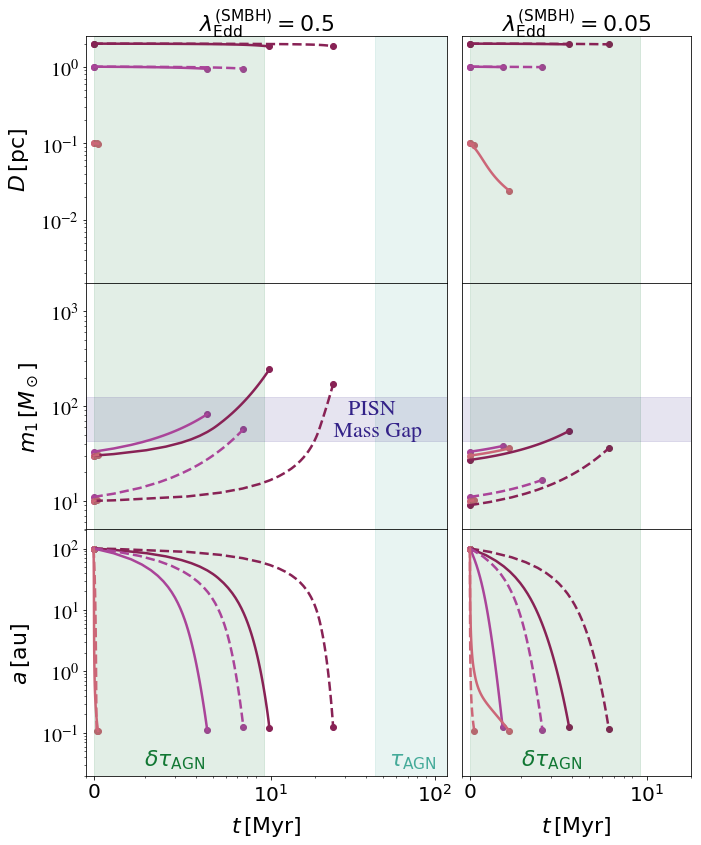

In [131]:
## rcparams adjustments
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

plt.rcParams['axes.labelsize'] = 22


## 
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
scatter = lambda plot_x,plot_y: [np.array([plot_x[0],plot_x[-1]]), np.array([plot_y[0],plot_y[-1]])]
tmax = 100. # Myr
amin = 1e-1 # au (minimum semimajor axis to cutoff plot at)
colors = ['#CC6677','#CC6677',
          '#AA4499', '#AA4499',
          '#882255', '#882255']
linest = ["--","-",
          "--","-",
          "--","-"]
plot_alpha = 0.12
plot_lw    = 2.5

#fig = plt.figure(constrained_layout=True,figsize=(10,12))
widths = [5,5]
heights = [4,4,4]
xmins = [0.9,0.9]
xmaxs = [120,20]
scale = widths[0]/(np.log10(xmaxs[0])-np.log10(xmins[0]))
widths[1] = scale*(np.log10(xmaxs[1])-np.log10(xmins[1]))

fig, ax_list = plt.subplots(3,2,figsize=(10,12),gridspec_kw={'height_ratios':heights,'width_ratios':widths})

for sgcnt in range(len(sg_list)):
    plot_t = []
    plot_D = []
    plot_M = []
    plot_a = []
    max_index = []
    max_index_time = []

    for i,solution in enumerate(solution_lists[sgcnt]):
        print("D0, a0, M0 = ", solution_ref_list[sgcnt]["%s" % i])
        time = solution.t
        D, M, a = solution.y
        time = time/(1e6*yr_to_sec)
        M    = M/smass_to_g
        a    = a/au_to_cm
        D    = D/pc_to_cm
        index = np.argmin(np.abs(a-amin))
        print("index = ", index)
        max_index.append(index)
        index = np.argmin(np.abs(time-tmax))
        max_index_time.append(index)
        print("merges in t = %e Myr at D = %e pc, M = %e solar masses" % (time[index],D[index],M[index]))
        print("\n")
        plot_t.append(time)
        plot_D.append(D)
        plot_M.append(M)
        plot_a.append(a)

    axcnt = 0
    for i in range(len(solution_list))[::-1]:
        _plot_t = plot_t[i][:max_index[i]]+1
        _plot_D = plot_D[i][:max_index[i]]
        ax_list[axcnt][sgcnt].plot(_plot_t, _plot_D,color=colors[i],lw=plot_lw,ls=linest[i])
        splot_t, splot_D = scatter(_plot_t,_plot_D)
        ax_list[axcnt][sgcnt].scatter(splot_t, splot_D,color=colors[i])
    #ax_list[axcnt].set_yscale('log')
    ax_list[axcnt][sgcnt].set_xlabel(r'$t\,[{\rm Myr}]$')
    ax_list[axcnt][sgcnt].set_ylabel(r'$D\,[{\rm pc}]$')
    ax_list[axcnt][sgcnt].xaxis.set_visible(False)
    ax_list[axcnt][sgcnt].set_yscale('log')
    ax_list[axcnt][sgcnt].set_ylim(1.5e-3,2.5)
    axcnt += 1

    for i in range(len(solution_list))[::-1]:
        _plot_t = plot_t[i][:max_index[i]]+1
        _plot_M = plot_M[i][:max_index[i]]/2. # divide by two for individual masses
        splot_t, splot_M = scatter(_plot_t,_plot_M)
        
        # Here we are shifting the evolutionary tracks slightly where the lines overlap
        if (i == 2) or (i == 3):
            ax_list[axcnt][sgcnt].plot(_plot_t, _plot_M*1.1,color=colors[i],lw=plot_lw,ls=linest[i])
            ax_list[axcnt][sgcnt].scatter(splot_t, splot_M*1.1,color=colors[i])
        elif ((i == 4) or (i == 5)) and (sgcnt == 1):
            ax_list[axcnt][sgcnt].plot(_plot_t, _plot_M*0.9,color=colors[i],lw=plot_lw,ls=linest[i])
            ax_list[axcnt][sgcnt].scatter(splot_t, splot_M*0.9,color=colors[i])
        else:
            ax_list[axcnt][sgcnt].plot(_plot_t, _plot_M,color=colors[i],lw=plot_lw,ls=linest[i])
            ax_list[axcnt][sgcnt].scatter(splot_t, splot_M,color=colors[i])
    ax_list[axcnt][sgcnt].set_yscale('log')
    ax_list[axcnt][sgcnt].set_ylabel(r'$t\,[{\rm Myr}]$')
    ax_list[axcnt][sgcnt].set_ylabel(r'$m_1\,[M_\odot]$')
    ax_list[axcnt][sgcnt].xaxis.set_visible(False)
    ax_list[axcnt][sgcnt].set_ylim(5,2e3)
    axcnt += 1

    for i in range(len(solution_list))[::-1]:
        _plot_t = plot_t[i][:max_index[i]]+1
        _plot_a = plot_a[i][:max_index[i]]
        ax_list[axcnt][sgcnt].plot(_plot_t, _plot_a,color=colors[i],lw=plot_lw,ls=linest[i])
        splot_t, splot_a = scatter(_plot_t,_plot_a)
        ax_list[axcnt][sgcnt].scatter(splot_t, splot_a,color=colors[i])


    ax_list[axcnt][sgcnt].set_yscale('log')
    ax_list[axcnt][sgcnt].set_xlabel(r'$t\,[{\rm Myr}]$')
    ax_list[axcnt][sgcnt].set_ylabel(r'$a\,[{\rm au}]$')
    ax_list[axcnt][sgcnt].set_ylim(0.02,205)
    ax_list[axcnt][sgcnt].legend(loc='best',frameon=False)


    if 1: # for logarithm x axis that starts at x = 0
        for i in range(3): 
            #x = plot_t[i][:max_index[i]]+1
            ax_list[i][sgcnt].set_xscale('log')
            ax_list[i][sgcnt].set_xlim(xmins[sgcnt],xmaxs[sgcnt])
        x = np.array([1,11,101])
        ax_list[i][sgcnt].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x-1)))
        ax_list[i][sgcnt].xaxis.set_major_locator(ticker.FixedLocator(x))
        ax_list[i][sgcnt].set_xticklabels([r"$0$",r"$10^1$", r"$10^2$"])
        #ax_list[i].set_xlim(0,1e3)

    if 1: # time regimes
        for i in range(3):
            ymin, ymax = ax_list[i][sgcnt].get_ylim()
            ax_list[i][sgcnt].fill_betweenx(np.array([ymin,ymax]), 1, 10,color='#117733',hatch='',alpha=plot_alpha,zorder=1)
            ax_list[i][sgcnt].fill_betweenx(np.array([ymin,ymax]), 45, 155,color='#44AA99',hatch='',alpha=plot_alpha,zorder=1)      
            ax_list[i][sgcnt].set_ylim(ymin,ymax)

    if 1: # labels for time regimes
        ax_list[-1][sgcnt].text(3,0.03,r"$\delta \tau_{\rm AGN}$",fontsize=22,color='#117733', horizontalalignment='center')
        if sgcnt==0:
            ax_list[-1][sgcnt].text(75,0.03,r"$\tau_{\rm AGN}$",fontsize=22,color='#44AA99', horizontalalignment='center')

    if 1: # fill mass gap
        # duBoisson 2020
        mlower = 43.
        mupper = 124.
        xmin   = xmins[0]
        xmax   = xmaxs[0]
        ax_list[1][sgcnt].fill_between(np.array([xmin,xmax]),np.array([mlower,mlower]),np.array([mupper,mupper]),hatch='',alpha=plot_alpha,color='#332288',zorder=1)

    if 1: # labels for PISN mass gap regimes
        if sgcnt==0:
            ax_list[1][sgcnt].text(45,48,"PISN \n Mass Gap",fontsize=22,color='#332288', horizontalalignment='center')

ax_list[0][0].set_title(r'$\lambda_{\rm Edd}^{(\rm SMBH)}=0.5$',fontsize=22)
#ax_list[0][0].set_title(r'$M_{\rm SMBH} = 10^8\,M_\odot, \lambda_{\rm Edd}^{(\rm SMBH)}=0.5$',fontsize=22)
ax_list[0][1].set_title(r'$\lambda_{\rm Edd}^{(\rm SMBH)}=0.05$',fontsize=22)

for i in range(3):
    ax_list[i][1].yaxis.set_visible(False)
    
plt.tight_layout()
plt.subplots_adjust(wspace=0.05,hspace=0.0)

if 0:
    plt.savefig('/home/nkaaz/Dropbox/BBH-AGNDisk/figures/final_machW/Fig_migrateEvolve_photontrapping.pdf')